In [482]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
warnings.filterwarnings('ignore')

data = pd.ExcelFile("C:/Users/pc/OneDrive/Desktop/ERM Data Assessment - Euan Cuell.xls")
data = data.parse('Answer')
data.drop(index=48, inplace=True)
data.drop(index=49, inplace=True)
data['Year'] = data['Year'].astype(int)

data.head()

,Year,Station,Oil & Grease,Total Organic Carbon,Total Hydrocarbons,Ammoniacal Nitrogen as N,Total Nitrogen,Nitrate as N,Nitrite as N,Total Phosphate,...,Particle Size Distribution 6,Particle Size Distribution 7,Particle Size Distribution 8,Particle Size Distribution 9,Particle Size Distribution 10,Particle Size Distribution 11,Particle Size Distribution 12,Gravel,Sand,Silt & Clay
0,2013,B1,10,0.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,92.8,7.1
1,2013,B2,10,0.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,87,13
2,2013,B3,10,0.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,91,8.3
3,2013,B4,10,0.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,89.4,10.3
4,2013,B5,10,0.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,96.8,3


In [483]:
def dataframe_info(df):
    temp = pd.DataFrame(index=df.columns)
    temp["Datatype"] = df.dtypes
    temp["Not null values"] = df.count()
    temp["Null values"] = df.isnull().sum()
    temp["Percentage of Null values"] = (df.isnull().mean())*100
    temp["Unique count"] = df.nunique()
    return temp
dataframe_info(data)

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
Year,int32,48,0,0.0,4
Station,object,48,0,0.0,12
Oil & Grease,object,48,0,0.0,13
Total Organic Carbon,object,48,0,0.0,19
Total Hydrocarbons,object,24,24,50.0,1
Ammoniacal Nitrogen as N,object,24,24,50.0,23
Total Nitrogen,object,24,24,50.0,23
Nitrate as N,object,24,24,50.0,1
Nitrite as N,object,24,24,50.0,3
Total Phosphate,object,12,36,75.0,1


## 1. Lets take a look at the Metals...
### (Aluminium, Arsenic, Barium, Cadmium, Chromium, Copper, Iron, Lead, Nickel, Vanadium, Zinc, Mercury)

In [484]:
metals = data.groupby('Year').agg({'Aluminium':'sum', 'Arsenic':'sum', 'Barium':'sum', 'Cadmium':'sum', 'Chromium':'sum', 'Copper':'sum', 'Iron':'sum', 'Lead':'sum', 'Nickel':'sum', 'Vanadium':'sum', 'Zinc':'sum', 'Mercury':'sum'})
metals.fillna(0, inplace=True)
metals['Grand Total'] = metals['Aluminium'] + metals['Arsenic'] + metals['Barium'] + metals['Cadmium'] + metals['Chromium'] + metals['Copper'] + metals['Iron'] + metals['Lead'] + metals['Nickel'] + metals['Vanadium'] + metals['Zinc'] + metals['Mercury']
metals


,Aluminium,Arsenic,Barium,Cadmium,Chromium,Copper,Iron,Lead,Nickel,Vanadium,Zinc,Mercury,Grand Total
Year,,,,,,,,,,,,,
2013,0,12,59.3,21.0,65.6,17.5,77324,106.2,100.2,194.3,303.9,6.0,78210.0
2016,0,12,64.5,12,70.0,12.5,164025,85.0,90.0,240.0,358.5,6.0,164975.5
2019,42785,135.0,83.5,12,73.5,93.0,166000,49,62.0,258.5,369.5,6.0,209927.0
2022,62570,181.0,64.4,12,85.5,17.0,228500,42.7,81.5,211.7,336.2,6.0,292108.0


### Lets take the sum of metals amongst all stations to see how much metal was collected at the 'site' for each year

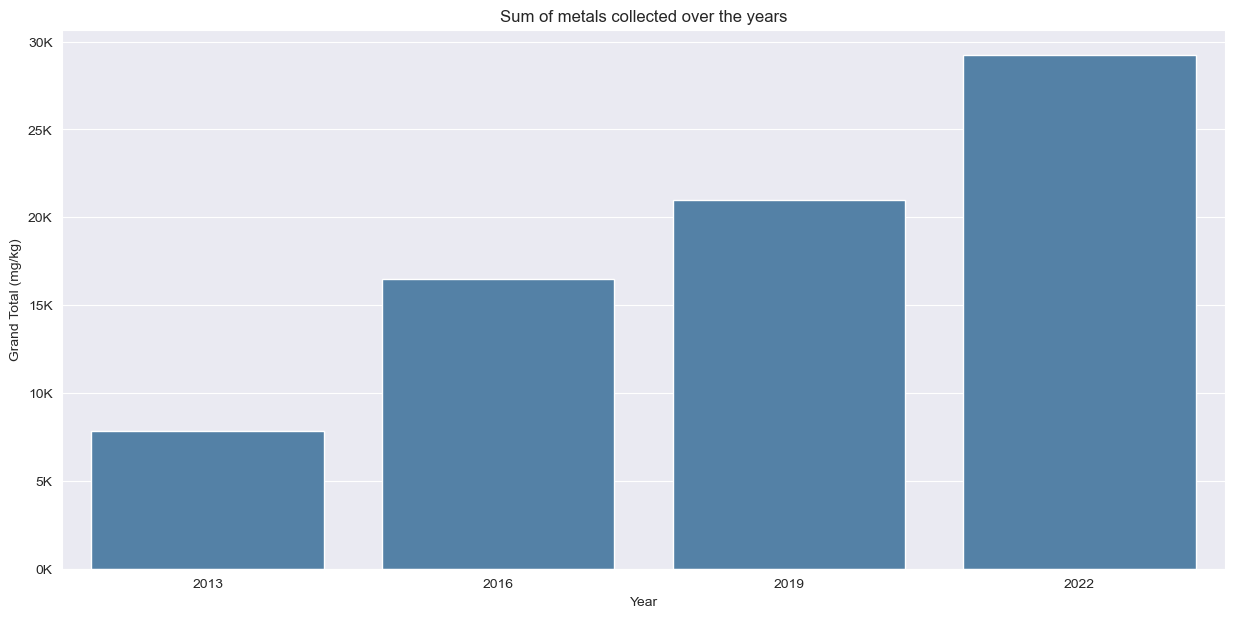

In [485]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(x=metals.index, y='Grand Total', data=metals, color='steelblue',ax=ax)
ax.set_title('Sum of metals collected over the years')
ax.set_ylabel('Grand Total (mg/kg)')
ax.set_yticklabels(['0K','5K','10K','15K','20K','25K','30K'])
plt.show()

#### We can see that throughout the years the amount of metal collected in the sediment collections has increased.

### Now from the sums of each year, lets see what metals the totals are composed of

     Aluminium    Iron Grand Total  Others
Year                                      
2013         0   77324     78210.0   886.0
2016         0  164025    164975.5   950.5
2019     42785  166000    209927.0  1142.0
2022     62570  228500    292108.0  1038.0


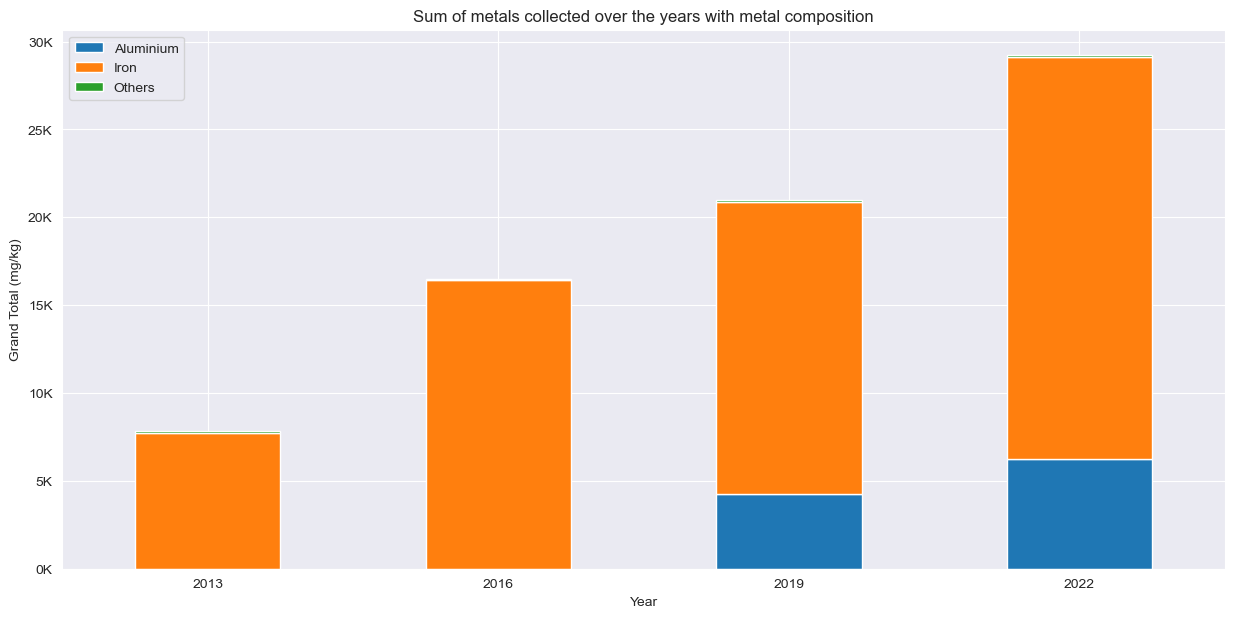

In [486]:
metals['Others'] = metals['Arsenic']+metals['Barium']+metals['Cadmium']+metals['Chromium']+metals['Copper']+metals['Lead']+metals['Nickel']+metals['Vanadium']+metals['Zinc']+metals['Mercury']
metals_Others = metals.drop(columns=['Arsenic','Barium','Cadmium','Chromium','Copper','Lead','Nickel','Vanadium','Zinc','Mercury'])
print(metals_Others)

metals_Others['perc_alu'] = (metals_Others['Aluminium']/metals_Others['Grand Total'])*100

fig, ax = plt.subplots(figsize = (15,7))
metals[['Aluminium','Iron','Others']].plot(kind='bar',stacked=True, ax=ax)
ax.set_xticklabels(labels=metals_Others.index, rotation=0)
ax.set_ylabel('Grand Total (mg/kg)')
ax.set_yticklabels(['0K','5K','10K','15K','20K','25K','30K'])
ax.set_title('Sum of metals collected over the years with metal composition')
plt.show()


#### It appears that the main bulk of metals collected at the site were Iron and Aluminium, whilst 'other' minor metals make up a small fraction of the collected sum each year.

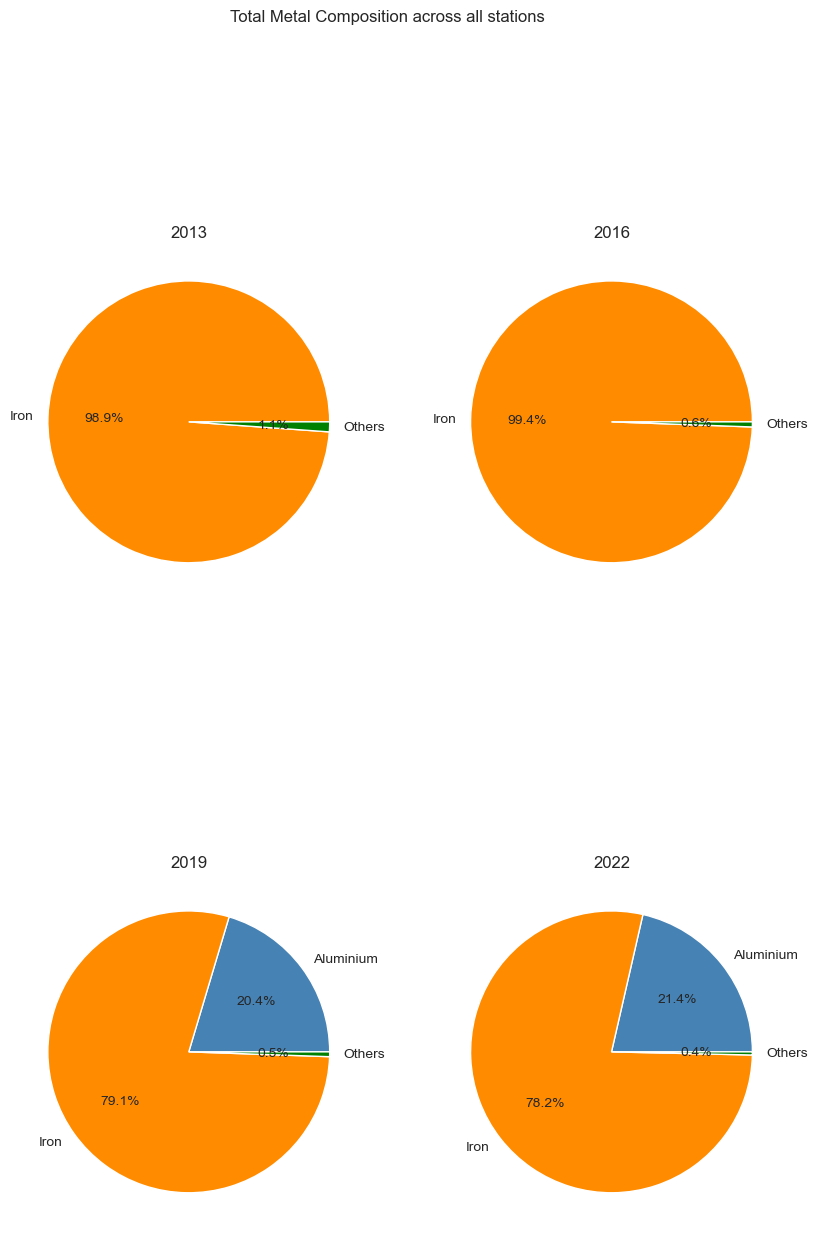

In [487]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize = (10,15))
fig.suptitle('Total Metal Composition across all stations')

ax0_x = [metals_Others['Iron'][2013], metals_Others['Others'][2013]]
ax0_label = ['Iron','Others']
ax0_color = ['darkorange','green']
ax[0][0].pie(x=ax0_x, labels=ax0_label, autopct='%1.1f%%', colors=ax0_color)
ax1_x = [metals_Others['Iron'][2016], metals_Others['Others'][2016]]
ax1_label = ['Iron','Others']
ax1_color = ['darkorange','green']
ax[0][1].pie(x=ax1_x, labels=ax1_label, autopct='%1.1f%%', colors=ax1_color)
ax2_x = [metals_Others['Aluminium'][2019], metals_Others['Iron'][2019], metals_Others['Others'][2019]]
ax2_label = ['Aluminium','Iron','Others']
ax2_color = ['steelblue','darkorange','green']
ax[1][0].pie(x=ax2_x, labels=ax2_label, autopct='%1.1f%%', colors=ax2_color)
ax3_x = [metals_Others['Aluminium'][2022], metals_Others['Iron'][2022], metals_Others['Others'][2022]]
ax3_label = ['Aluminium','Iron','Others']
ax3_color = ['steelblue','darkorange','green']
ax[1][1].pie(x=ax3_x, labels=ax3_label, autopct='%1.1f%%', colors=ax3_color)

ax[0][0].set_title('2013')
ax[0][1].set_title('2016')
ax[1][0].set_title('2019')
ax[1][1].set_title('2022')

plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.show()

#### In both 2013 and 2016, around 99% of metals collected in both years consisted of Iron, whilst the other 1.1% and 0.6% respectively consisted of minor metals.
#### In 2019 and 2022 however, around 80% of metals collected in both years consisted of Iron, a second dominant metal, Aluminium, arose consisting of 20.4% and 21.4% of the total collected metals respectively, whilst the minor metals consisted only of 0.5% and 0.4% of the total sample respectively.

### Lets take a closer look at the minor metals, which exclude Iron and Aluminium...

     Arsenic Barium Cadmium Chromium Copper   Lead Nickel Vanadium   Zinc  \
Year                                                                        
2013      12   59.3    21.0     65.6   17.5  106.2  100.2    194.3  303.9   
2016      12   64.5      12     70.0   12.5   85.0   90.0    240.0  358.5   
2019   135.0   83.5      12     73.5   93.0     49   62.0    258.5  369.5   
2022   181.0   64.4      12     85.5   17.0   42.7   81.5    211.7  336.2   

     Mercury  
Year          
2013     6.0  
2016     6.0  
2019     6.0  
2022     6.0  


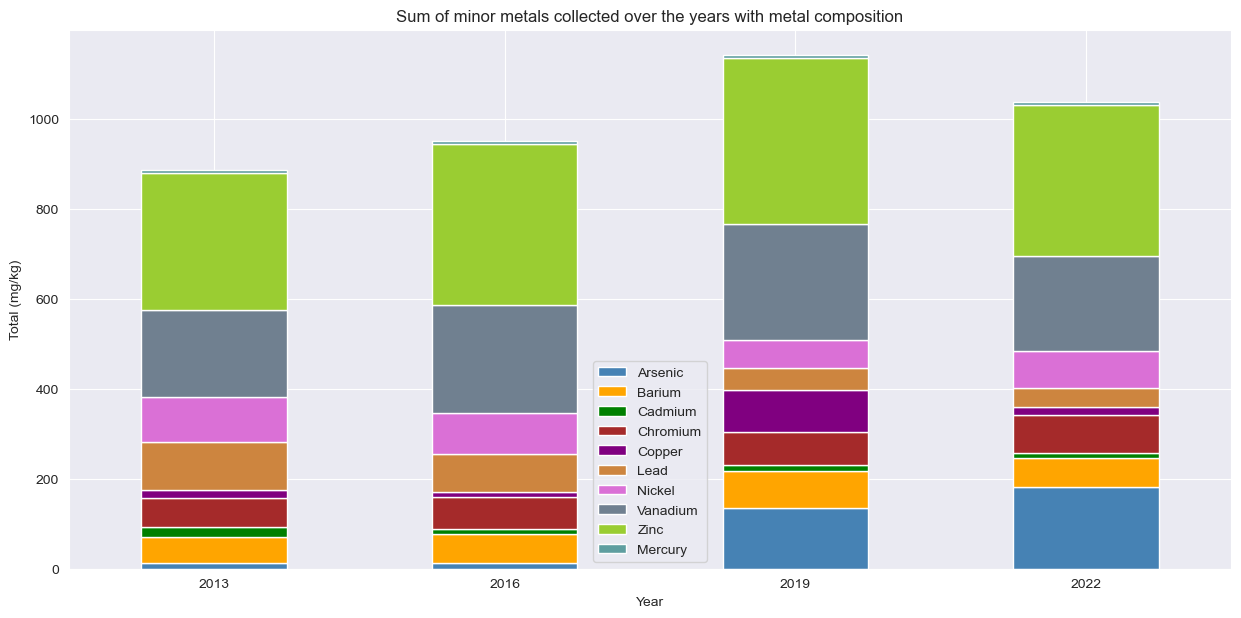

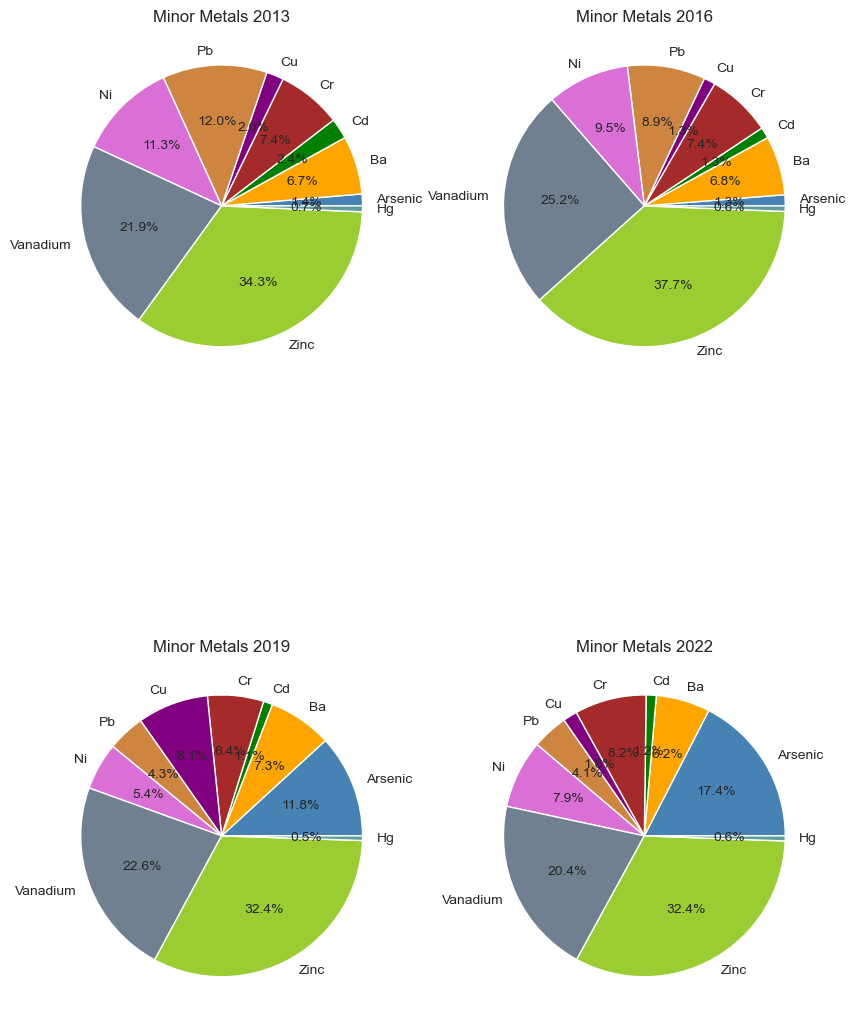

In [488]:
metals_minor = metals.drop(columns=['Aluminium', 'Iron','Others', 'Grand Total'])
print(metals_minor)

fig, ax = plt.subplots(figsize=(15,7))
metals_minor[['Arsenic','Barium','Cadmium','Chromium','Copper','Lead','Nickel','Vanadium','Zinc','Mercury']].plot(kind='bar', stacked=True, ax=ax, color = ['steelblue','orange','green','brown','purple','peru','orchid','slategray','yellowgreen','cadetblue'])
ax.set_title('Sum of minor metals collected over the years with metal composition')
ax.set_xticklabels(labels=metals_minor.index,rotation=0)
ax.set_ylabel('Total (mg/kg)')
plt.show()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,15))
ax0_x = [metals_minor['Arsenic'][2013],metals_minor['Barium'][2013],metals_minor['Cadmium'][2013],metals_minor['Chromium'][2013],metals_minor['Copper'][2013],metals_minor['Lead'][2013],metals_minor['Nickel'][2013],metals_minor['Vanadium'][2013],metals_minor['Zinc'][2013],metals_minor['Mercury'][2013]]
ax0_label = ['Arsenic','Ba','Cd','Cr','Cu','Pb','Ni','Vanadium','Zinc','Hg']
ax0_color = ['steelblue','orange','green','brown','purple','peru','orchid','slategray','yellowgreen','cadetblue']
ax[0][0].pie(x=ax0_x, labels=ax0_label, autopct='%1.1f%%', colors=ax0_color)
ax1_x = [metals_minor['Arsenic'][2016],metals_minor['Barium'][2016],metals_minor['Cadmium'][2016],metals_minor['Chromium'][2016],metals_minor['Copper'][2016],metals_minor['Lead'][2016],metals_minor['Nickel'][2016],metals_minor['Vanadium'][2016],metals_minor['Zinc'][2016],metals_minor['Mercury'][2016]]
ax1_label = ['Arsenic','Ba','Cd','Cr','Cu','Pb','Ni','Vanadium','Zinc','Hg']
ax1_color = ['steelblue','orange','green','brown','purple','peru','orchid','slategray','yellowgreen','cadetblue']
ax[0][1].pie(x=ax1_x, labels=ax1_label, autopct='%1.1f%%', colors=ax1_color)
ax2_x = [metals_minor['Arsenic'][2019],metals_minor['Barium'][2019],metals_minor['Cadmium'][2019],metals_minor['Chromium'][2019],metals_minor['Copper'][2019],metals_minor['Lead'][2019],metals_minor['Nickel'][2019],metals_minor['Vanadium'][2019],metals_minor['Zinc'][2019],metals_minor['Mercury'][2019]]
ax2_label = ['Arsenic','Ba','Cd','Cr','Cu','Pb','Ni','Vanadium','Zinc','Hg']
ax2_color = ['steelblue','orange','green','brown','purple','peru','orchid','slategray','yellowgreen','cadetblue']
ax[1][0].pie(x=ax2_x, labels=ax2_label, autopct='%1.1f%%', colors=ax2_color)
ax3_x = [metals_minor['Arsenic'][2022],metals_minor['Barium'][2022],metals_minor['Cadmium'][2022],metals_minor['Chromium'][2022],metals_minor['Copper'][2022],metals_minor['Lead'][2022],metals_minor['Nickel'][2022],metals_minor['Vanadium'][2022],metals_minor['Zinc'][2022],metals_minor['Mercury'][2022]]
ax3_label = ['Arsenic','Ba','Cd','Cr','Cu','Pb','Ni','Vanadium','Zinc','Hg']
ax3_color = ['steelblue','orange','green','brown','purple','peru','orchid','slategray','yellowgreen','cadetblue']
ax[1][1].pie(x=ax3_x, labels=ax3_label, autopct='%1.1f%%', colors=ax3_color)

#['Arsenic','Barium','Cadmium','Chromium','Copper','Lead','Nickel','Vanadium','Zinc','Mercury']

ax[0][0].set_title('Minor Metals 2013')
ax[0][1].set_title('Minor Metals 2016')
ax[1][0].set_title('Minor Metals 2019')
ax[1][1].set_title('Minor Metals 2022')
plt.show()


#### There does appear to be a general upwards trend in the amount of minor metals collected throughout the years.
#### Every collection year Zinc and Vanadium are the first and second most collected minor metals respectively.
#### In 2013 and 2016 there was only small amounts of Arsenic amongst the minor metals collected, however, in 2019 and 2022, a noticably larger amount of Arsenic was collected 


### Lets take a look at whether the amount of Iron and Aluminium collected at each station changed over the years...

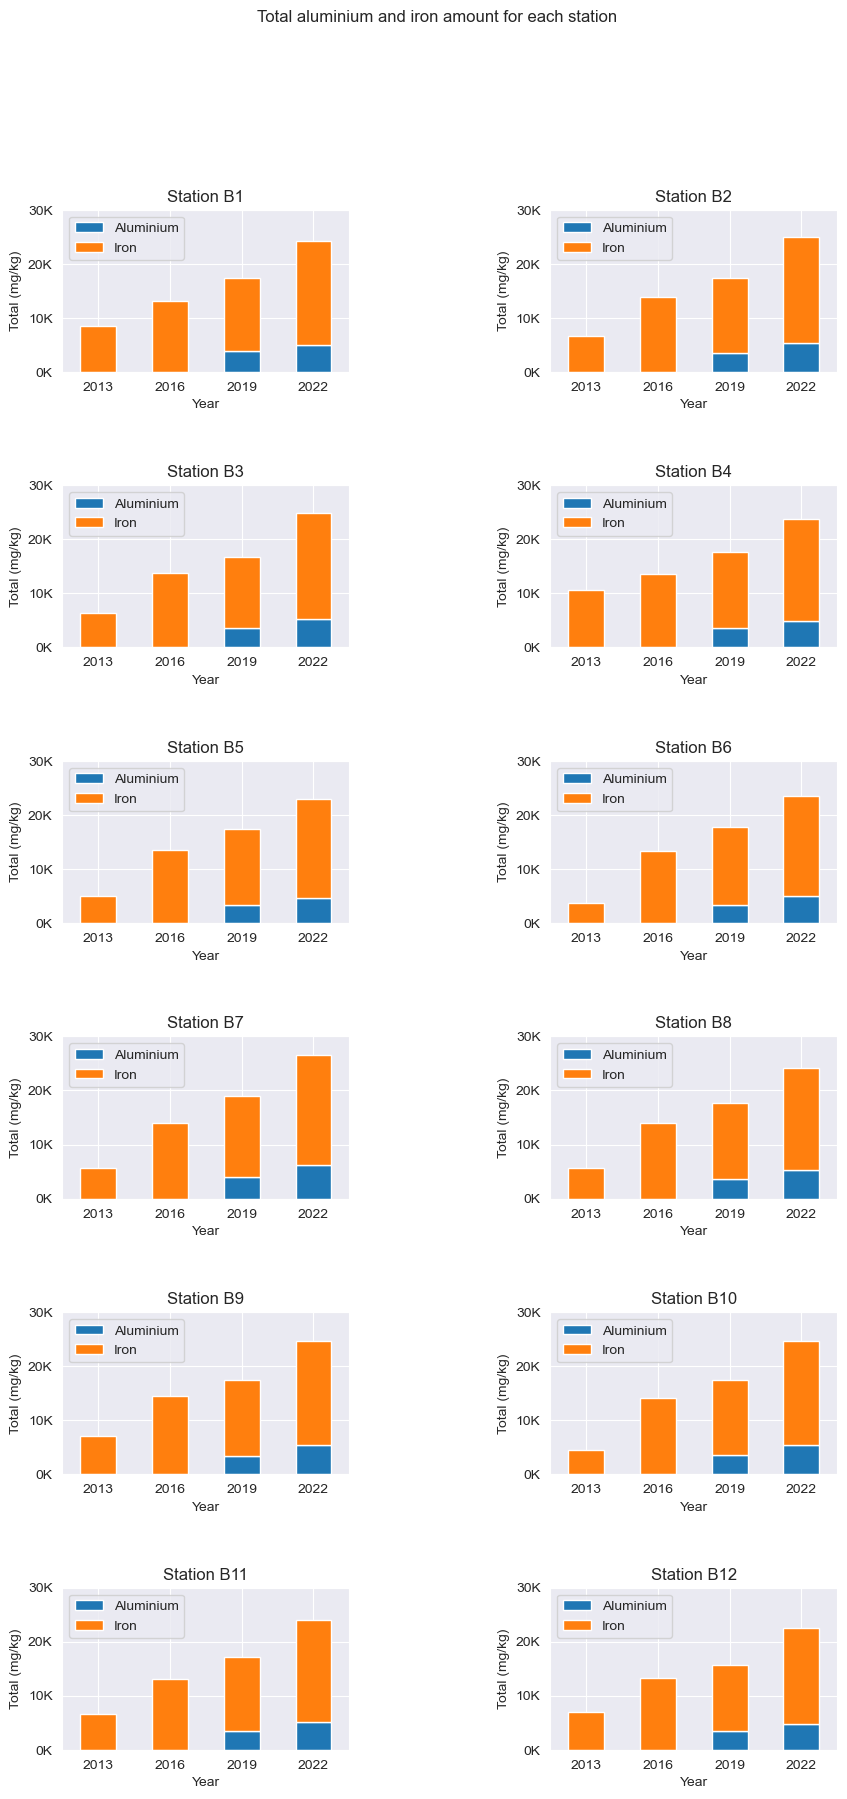

In [489]:
station1 = data[data['Station']=='B1']
station1.set_index('Year', inplace=True)

station2 = data[data['Station']=='B2']
station2.set_index('Year', inplace=True)

station3 = data[data['Station']=='B3']
station3.set_index('Year', inplace=True)

station4 = data[data['Station']=='B4']
station4.set_index('Year', inplace=True)

station5 = data[data['Station']=='B5']
station5.set_index('Year', inplace=True)

station6 = data[data['Station']=='B6']
station6.set_index('Year', inplace=True)

station7 = data[data['Station']=='B7']
station7.set_index('Year', inplace=True)

station8 = data[data['Station']=='B8']
station8.set_index('Year', inplace=True)

station9 = data[data['Station']=='B9']
station9.set_index('Year', inplace=True)

station10 = data[data['Station']=='B10']
station10.set_index('Year', inplace=True)

station11 = data[data['Station']=='B11']
station11.set_index('Year', inplace=True)

station12 = data[data['Station']=='B12']
station12.set_index('Year', inplace=True)

fig,ax = plt.subplots(nrows=6, ncols=2, figsize=(10,20))

fig.suptitle('Total aluminium and iron amount for each station')

station1[['Aluminium','Iron']].plot(kind='bar',stacked=True,ax=ax[0][0])
station2[['Aluminium','Iron']].plot(kind='bar',stacked=True,ax=ax[0][1])
station3[['Aluminium','Iron']].plot(kind='bar',stacked=True,ax=ax[1][0])
station4[['Aluminium','Iron']].plot(kind='bar',stacked=True,ax=ax[1][1])
station5[['Aluminium','Iron']].plot(kind='bar',stacked=True,ax=ax[2][0])
station6[['Aluminium','Iron']].plot(kind='bar',stacked=True,ax=ax[2][1])
station7[['Aluminium','Iron']].plot(kind='bar',stacked=True,ax=ax[3][0])
station8[['Aluminium','Iron']].plot(kind='bar',stacked=True,ax=ax[3][1])
station9[['Aluminium','Iron']].plot(kind='bar',stacked=True,ax=ax[4][0])
station10[['Aluminium','Iron']].plot(kind='bar',stacked=True,ax=ax[4][1])
station11[['Aluminium','Iron']].plot(kind='bar',stacked=True,ax=ax[5][0])
station12[['Aluminium','Iron']].plot(kind='bar',stacked=True,ax=ax[5][1])

ax[0][0].set_ylim(0,30000)
ax[0][1].set_ylim(0,30000)
ax[1][0].set_ylim(0,30000)
ax[1][1].set_ylim(0,30000)
ax[2][0].set_ylim(0,30000)
ax[2][1].set_ylim(0,30000)
ax[3][0].set_ylim(0,30000)
ax[3][1].set_ylim(0,30000)
ax[4][0].set_ylim(0,30000)
ax[4][1].set_ylim(0,30000)
ax[5][0].set_ylim(0,30000)
ax[5][1].set_ylim(0,30000)

ax[0][0].set_title('Station B1')
ax[0][1].set_title('Station B2')
ax[1][0].set_title('Station B3')
ax[1][1].set_title('Station B4')
ax[2][0].set_title('Station B5')
ax[2][1].set_title('Station B6')
ax[3][0].set_title('Station B7')
ax[3][1].set_title('Station B8')
ax[4][0].set_title('Station B9')
ax[4][1].set_title('Station B10')
ax[5][0].set_title('Station B11')
ax[5][1].set_title('Station B12')

ax[0][0].set_xticklabels(labels=station1.index, rotation=0)
ax[0][1].set_xticklabels(labels=station2.index, rotation=0)
ax[1][0].set_xticklabels(labels=station3.index, rotation=0)
ax[1][1].set_xticklabels(labels=station4.index, rotation=0)
ax[2][0].set_xticklabels(labels=station5.index, rotation=0)
ax[2][1].set_xticklabels(labels=station6.index, rotation=0)
ax[3][0].set_xticklabels(labels=station7.index, rotation=0)
ax[3][1].set_xticklabels(labels=station8.index, rotation=0)
ax[4][0].set_xticklabels(labels=station9.index, rotation=0)
ax[4][1].set_xticklabels(labels=station10.index, rotation=0)
ax[5][0].set_xticklabels(labels=station11.index, rotation=0)
ax[5][1].set_xticklabels(labels=station12.index, rotation=0)

for ax in ax.reshape(-1):
    ax.set_yticklabels(['0K','10K','20K','30K'])
    ax.set_ylabel('Total (mg/kg)')

plt.subplots_adjust(wspace=0.7, hspace=0.7)
plt.show()

#### There doesn't seem to be any sort of discrepancy between the stations. All stations saw a similar increase in Iron and Aluminium throughout the years 

## 2. Now lets take a look at the soil condition...
### (Gravel, Sand, Silt & Clay)

In [490]:
soil = data[['Year','Station','Gravel','Sand','Silt & Clay']]
soil_grouped = soil.groupby('Year').agg({'Gravel':'mean','Sand':'mean','Silt & Clay':'mean'})
soil_grouped['Sand'] = round(soil_grouped['Sand'],2)
soil_grouped['Silt & Clay'] = round(soil_grouped['Silt & Clay'],2)
soil_grouped


,Gravel,Sand,Silt & Clay
Year,,,
2013,0.25,90.44,9.31
2016,0.00,89.08,10.92
2019,0.00,85.46,14.54
2022,0.00,91.25,8.75


### Lets look at the the average soil composition amongst the 12 stations at the site for each year

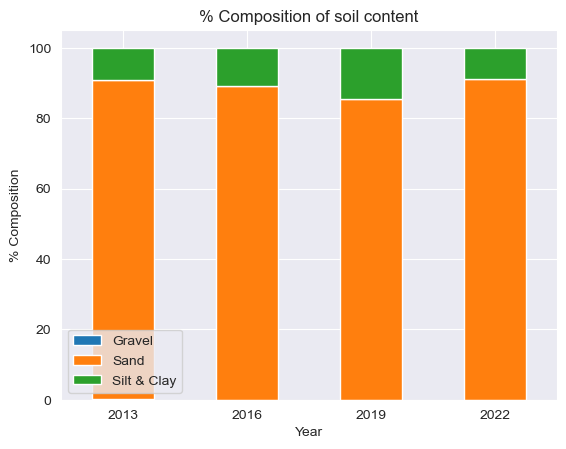

In [491]:
fig, ax = plt.subplots()
soil_grouped[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True, ax=ax)
ax.set_xticklabels(labels=soil_grouped.index,rotation=0)
ax.set_ylabel('% Composition')
ax.set_title('% Composition of soil content')
plt.show()

#### The average soil composition amongst all 12 stations seems to remain the same at each sediment collection year. On average around 90% of the soil at the site consists of sand at every collection year. Whilst the other 10% on average consists of silt & clay. Whilst either a negligible amount or no Gravel at all was found across the 4 sediment collection years.

### Lets see if theres any discrepancy in soil composition for each station over the years

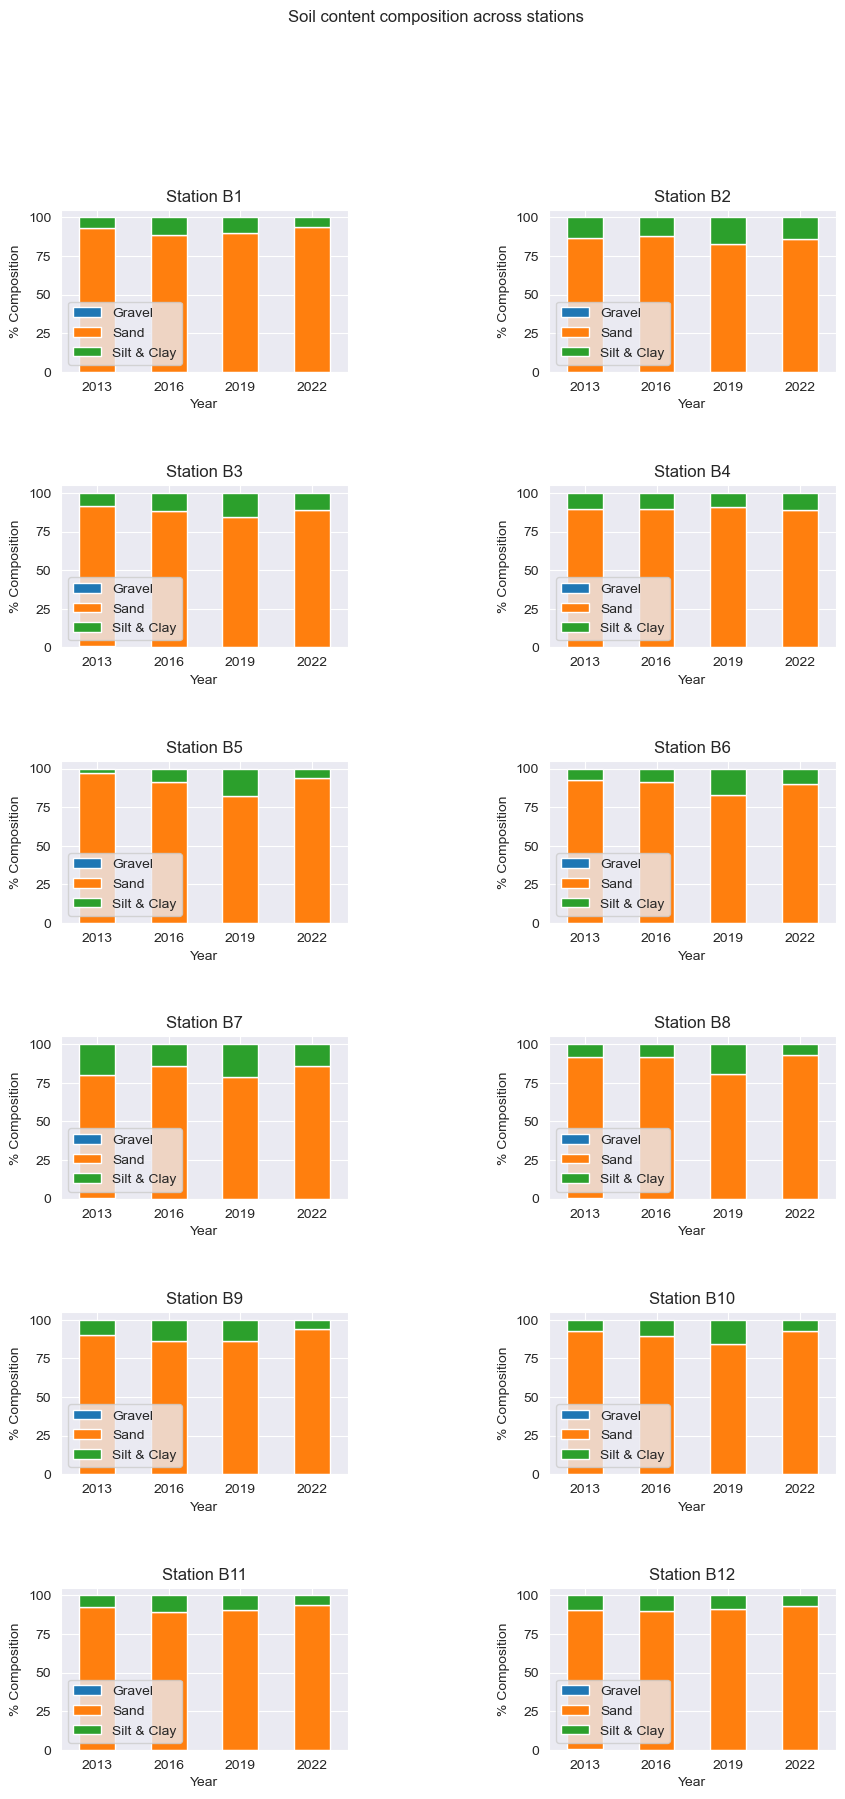

In [492]:
station1_soil = soil[soil['Station']=='B1']
station1_soil.set_index('Year', inplace=True)

station2_soil = soil[soil['Station']=='B2']
station2_soil.set_index('Year', inplace=True)

station3_soil = soil[soil['Station']=='B3']
station3_soil.set_index('Year', inplace=True)

station4_soil = soil[soil['Station']=='B4']
station4_soil.set_index('Year', inplace=True)

station5_soil = soil[soil['Station']=='B5']
station5_soil.set_index('Year', inplace=True)

station6_soil = soil[soil['Station']=='B6']
station6_soil.set_index('Year', inplace=True)

station7_soil = soil[soil['Station']=='B7']
station7_soil.set_index('Year', inplace=True)

station8_soil = soil[soil['Station']=='B8']
station8_soil.set_index('Year', inplace=True)

station9_soil = soil[soil['Station']=='B9']
station9_soil.set_index('Year', inplace=True)

station10_soil = soil[soil['Station']=='B10']
station10_soil.set_index('Year', inplace=True)

station11_soil = soil[soil['Station']=='B11']
station11_soil.set_index('Year', inplace=True)

station12_soil = soil[soil['Station']=='B12']
station12_soil.set_index('Year', inplace=True)

fig,ax = plt.subplots(nrows=6, ncols=2, figsize=(10,20))

fig.suptitle('Soil content composition across stations')

station1_soil[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True,ax=ax[0][0])
station2_soil[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True,ax=ax[0][1])
station3_soil[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True,ax=ax[1][0])
station4_soil[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True,ax=ax[1][1])
station5_soil[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True,ax=ax[2][0])
station6_soil[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True,ax=ax[2][1])
station7_soil[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True,ax=ax[3][0])
station8_soil[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True,ax=ax[3][1])
station9_soil[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True,ax=ax[4][0])
station10_soil[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True,ax=ax[4][1])
station11_soil[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True,ax=ax[5][0])
station12_soil[['Gravel','Sand','Silt & Clay']].plot(kind='bar',stacked=True,ax=ax[5][1])

ax[0][0].set_title('Station B1')
ax[0][1].set_title('Station B2')
ax[1][0].set_title('Station B3')
ax[1][1].set_title('Station B4')
ax[2][0].set_title('Station B5')
ax[2][1].set_title('Station B6')
ax[3][0].set_title('Station B7')
ax[3][1].set_title('Station B8')
ax[4][0].set_title('Station B9')
ax[4][1].set_title('Station B10')
ax[5][0].set_title('Station B11')
ax[5][1].set_title('Station B12')

ax[0][0].set_xticklabels(labels=station1.index, rotation=0)
ax[0][1].set_xticklabels(labels=station2.index, rotation=0)
ax[1][0].set_xticklabels(labels=station3.index, rotation=0)
ax[1][1].set_xticklabels(labels=station4.index, rotation=0)
ax[2][0].set_xticklabels(labels=station5.index, rotation=0)
ax[2][1].set_xticklabels(labels=station6.index, rotation=0)
ax[3][0].set_xticklabels(labels=station7.index, rotation=0)
ax[3][1].set_xticklabels(labels=station8.index, rotation=0)
ax[4][0].set_xticklabels(labels=station9.index, rotation=0)
ax[4][1].set_xticklabels(labels=station10.index, rotation=0)
ax[5][0].set_xticklabels(labels=station11.index, rotation=0)
ax[5][1].set_xticklabels(labels=station12.index, rotation=0)

for ax in ax.reshape(-1):
    ax.set_ylabel('% Composition')
    


plt.subplots_adjust(wspace=0.7, hspace=0.7)

plt.show()

#### Asides from some minor changes in the soil composition, each station appears to perform similarly each year, with sand being the dominant material, silt  & clay being less notable, and gravel either being absent completely or unnoticably small.